**Name:** Tarun Kumar Reddy </br>
**School:** Computing and Data Science </br>
**Email Address:** tarun.g-25@scds.saiuniversity.edu.in

## Importing Libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


## Loading the Data
Loading pre-processed data from the GDrive

In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Deep_Learning_Final_Project/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Deep_Learning_Final_Project/X_test_std.npy')
y_train = load('/content/drive/MyDrive/Deep_Learning_Final_Project/y_train.npy')
y_test = load('/content/drive/MyDrive/Deep_Learning_Final_Project/y_test.npy')

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (378, 299, 299, 3)
X_test_std_shape: (127, 299, 299, 3)


## Loading the best TL model

In [ ]:
model1_FT = keras.models.load_model('/content/drive/MyDrive/Deep_Learning_Final_Project/model1_TL.h5')

In [ ]:
len(model1_FT.layers)

784

In [ ]:
784 * 0.25

196.0

In [ ]:
# Fine-tune the model from index 196(25%) onwards

for layer in model1_FT.layers[:195]:
  layer.trainable = False

for layer in model1_FT.layers[195:]:
  layer.trainable = True

## Training the model

In [ ]:
model1_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT = [
             keras.callbacks.ModelCheckpoint("model1FT.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model1_FT.fit(x = X_train_std, y = y_train, epochs=20,
                          validation_split=0.1, batch_size=32, callbacks=callbacks_FT)

Epoch 1/20
11/11 [==============================] - 108s 2s/step - loss: 0.4033 - accuracy: 0.8971 - val_loss: 8070274.5000 - val_accuracy: 0.3158
Epoch 2/20
11/11 [==============================] - 9s 808ms/step - loss: 0.2464 - accuracy: 0.9088 - val_loss: 195845248.0000 - val_accuracy: 0.2895
Epoch 3/20
11/11 [==============================] - 9s 822ms/step - loss: 0.1705 - accuracy: 0.9500 - val_loss: 1283556352.0000 - val_accuracy: 0.2895
Epoch 4/20
11/11 [==============================] - 9s 786ms/step - loss: 0.0842 - accuracy: 0.9618 - val_loss: 123299352.0000 - val_accuracy: 0.2368
Epoch 5/20
11/11 [==============================] - 9s 817ms/step - loss: 0.2180 - accuracy: 0.9529 - val_loss: 5356563.0000 - val_accuracy: 0.3158
Epoch 6/20
11/11 [==============================] - 11s 992ms/step - loss: 0.1237 - accuracy: 0.9647 - val_loss: 238097.8438 - val_accuracy: 0.3421
Epoch 7/20
11/11 [==============================] - 10s 923ms/step - loss: 0.1305 - accuracy: 0.9559 - val

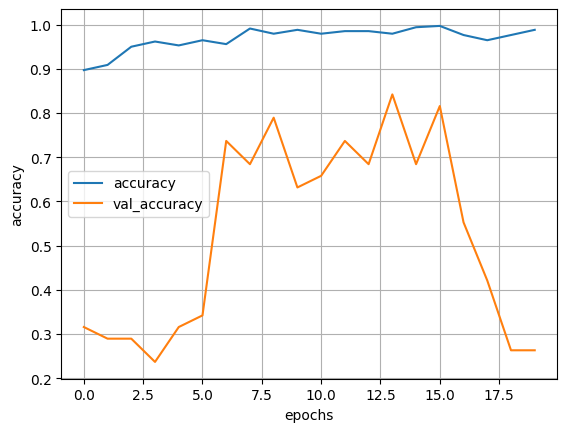

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
model1_FT.load_weights("model1FT.h5")
testLoss_model12 , testAccuracy_model12 = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_model12, testAccuracy_model12))

4/4 [==============================] - 6s 2s/step - loss: 0.6290 - accuracy: 0.7795
Test-loss: 0.629013, Test-accuracy: 0.779528


In [ ]:
cProba = model1_FT.predict(X_test_std[:3])
print(cProba)

1/1 [==============================] - 0s 62ms/step
[[0.4674788  0.41564947 0.06093007 0.05594166]]


In [ ]:
y_test[3]

1

In [ ]:
np.argmax(cProba)

0

In [ ]:
model1_FT.save("/content/drive/MyDrive/Deep_Learning_Final_Project/model1_FT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model1_FT = keras.models.load_model('/content/drive/MyDrive/Deep_Learning_Final_Project/model1_FT.h5')

4/4 [==============================] - 19s 2s/step
Classification report for classifier <keras.src.engine.functional.Functional object at 0x7e193816ffd0>:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        26
           1       0.69      0.82      0.75        33
           2       0.86      0.57      0.69        21
           3       0.88      0.91      0.90        47

    accuracy                           0.78       127
   macro avg       0.78      0.74      0.75       127
weighted avg       0.79      0.78      0.78       127




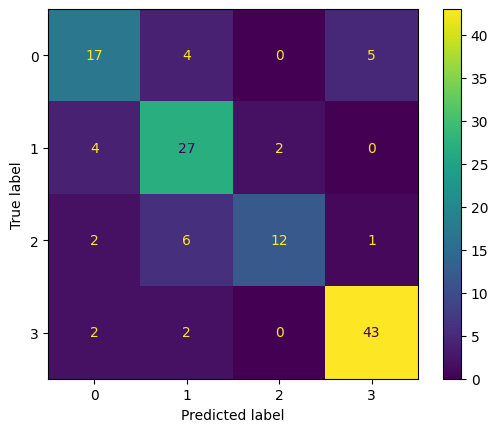

In [ ]:
from sklearn import metrics
predicted = model1_FT.predict(X_test_std)
predicted_class = np.argmax(predicted, axis=1)

print("Classification report for classifier %s:\n%s\n"
% (model1_FT, metrics.classification_report(y_test, predicted_class)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted_class)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()